# 1. Image Resizing
In this exercise, you will create Python code to re-size a given image to a given target resolution w x h . Note this means the code should be able to both both upscale and downscale images.

## a. Nearest Neigbour Interpolation
Write an image re-sizing function that resizes using the nearest neighbor method and returns the re-sized image.

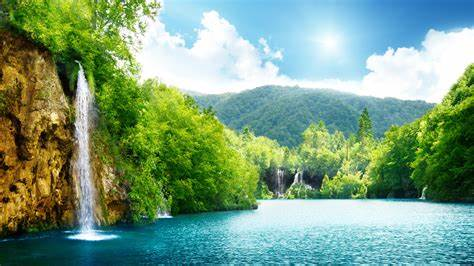

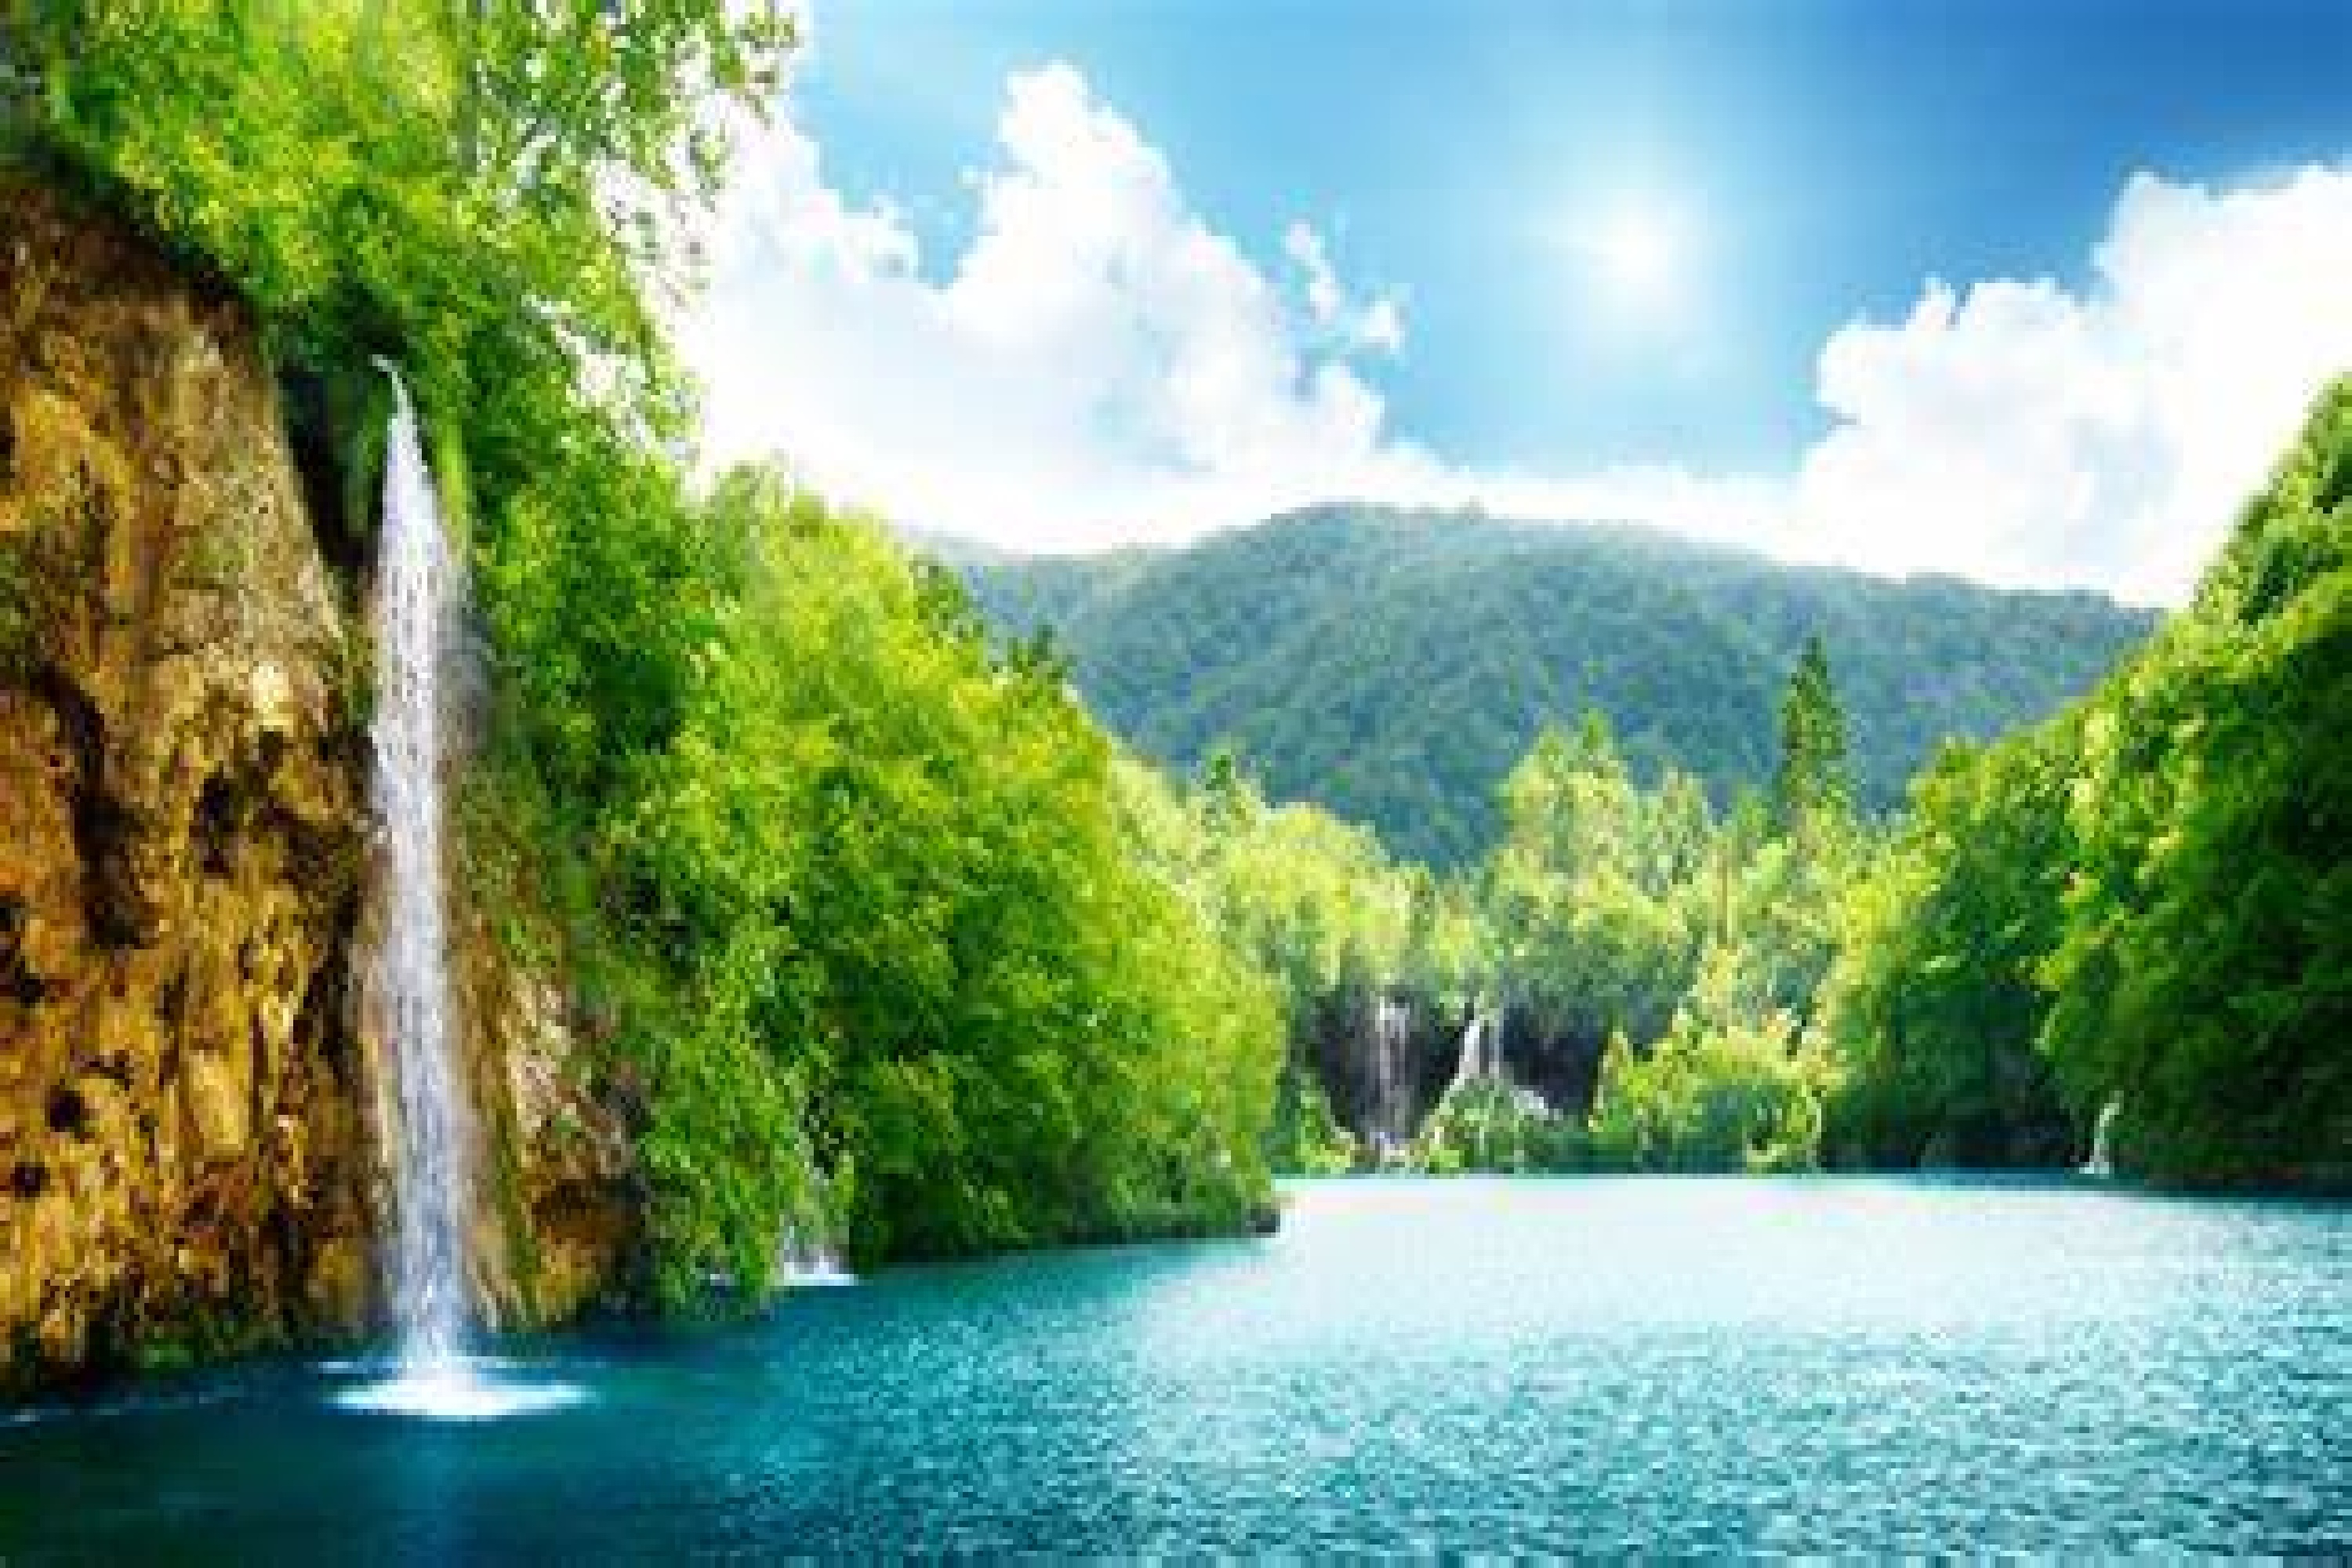

In [10]:
import cv2 as cv 
from IPython.display import Image, display

# Load the image
img = cv.imread('OIP.jpg')

# Resize the image using the nearest neighbour interpolation
resize_image = cv.resize(img, (3000, 2000), interpolation=cv.INTER_NEAREST)

# Save modified image
output_file = "resize_image.jpg"
cv.imwrite(output_file, resize_image)

# Displaying the images
display(Image(filename='OIP.jpg'))
display(Image(filename=output_file))



## b. Bilinear Interpolation

Write an image re-sizing function that resizes using the bilinear interpolation method and returns the re-sized image.

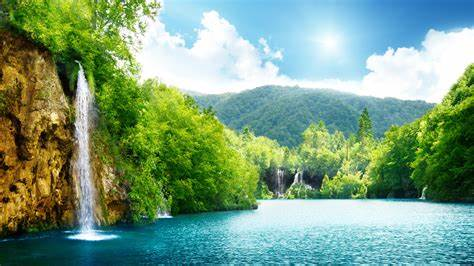

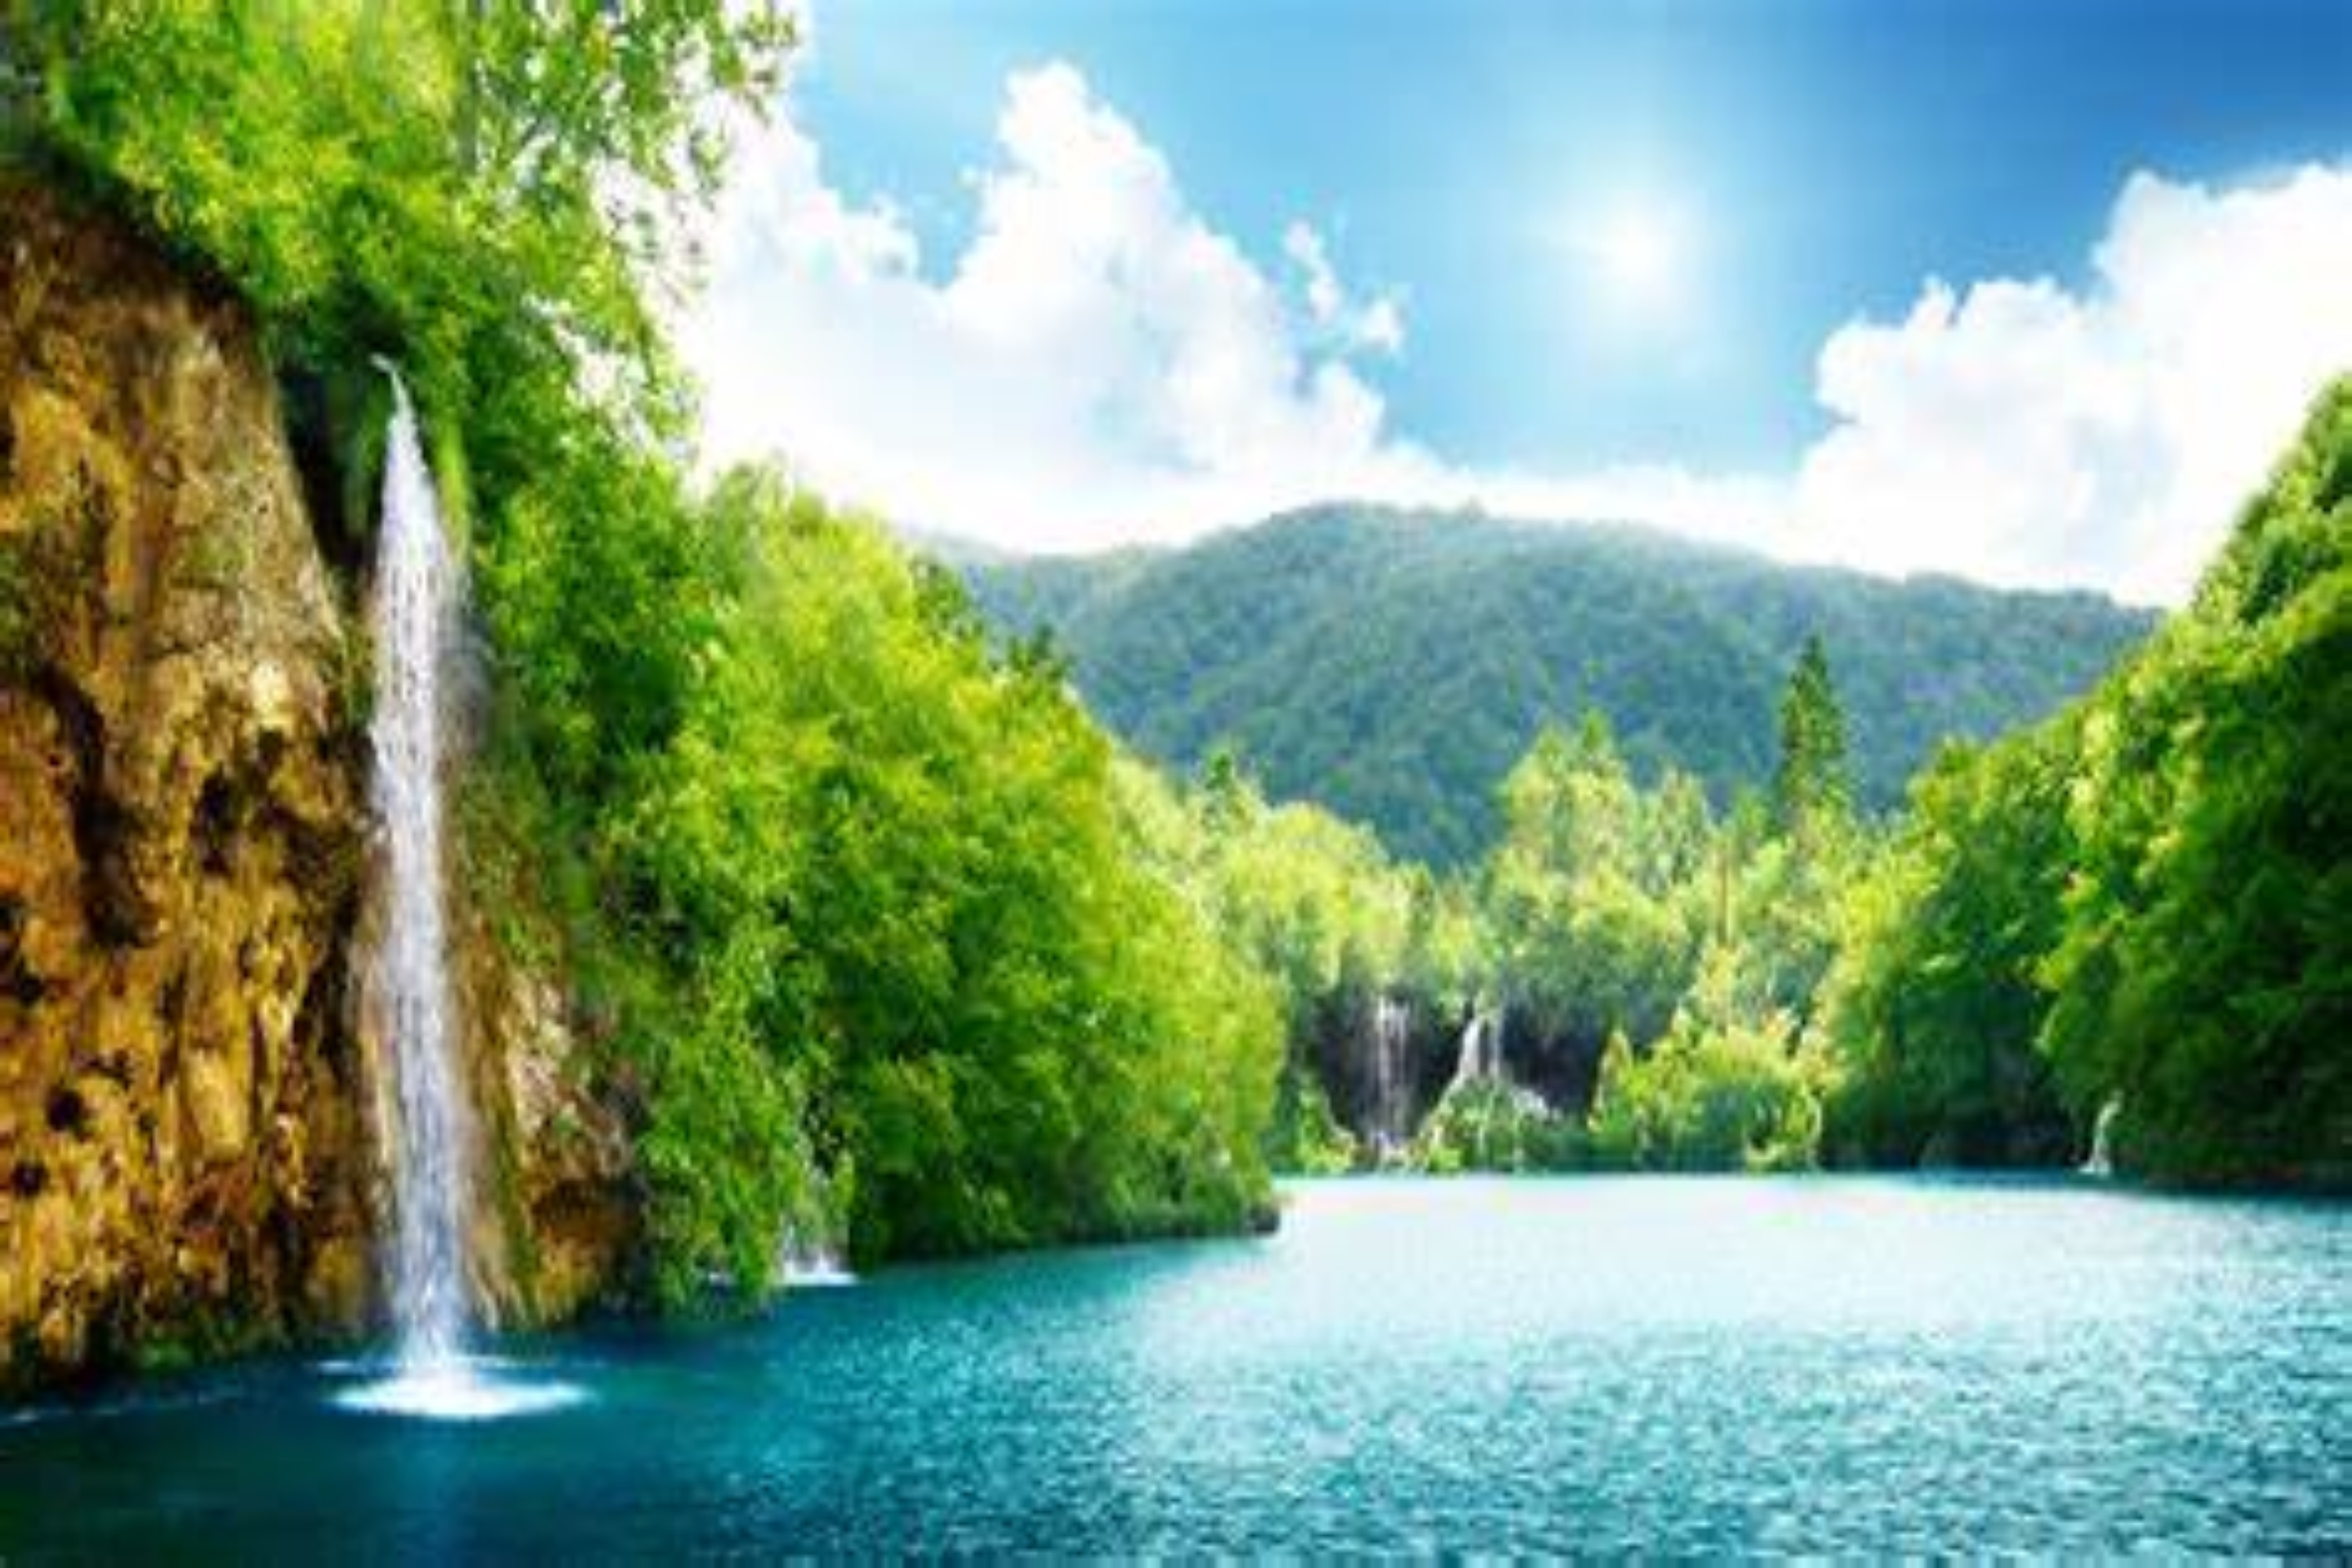

In [11]:
import cv2 as cv 
from IPython.display import Image, display

# Load the image
img = cv.imread('OIP.jpg')

# Resize the image using the nearest neighbour interpolation
resize_image = cv.resize(img, (3000, 2000), interpolation=cv.INTER_LINEAR)

# Save modified image
output_file = "resize_image.jpg"
cv.imwrite(output_file, resize_image)

# Displaying the images
display(Image(filename='OIP.jpg'))
display(Image(filename=output_file))

# 2. Image Filtering
In this exercise, you will create Python code to apply filters to a given image.

## a. Convolution filter

Create a function that applies a convolution filter (specified by a window image) and creates a separate filtered image as the result.

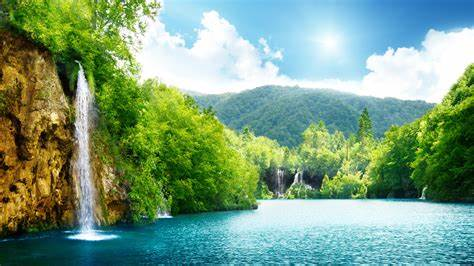

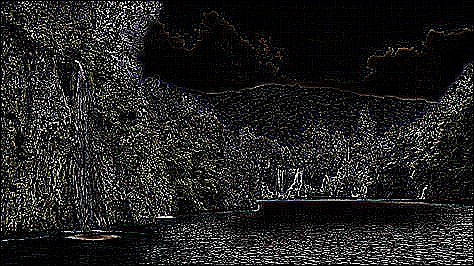

In [12]:
import cv2 as cv
import numpy as np 
from IPython.display import Image, display

# Loading the image
img = cv.imread('OIP.jpg')

# Defining the kernel 
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Applying the convolution filter
kernel_height, kernel_width = kernel.shape
# Get the dimensions of the image
image_height, image_width, image_channels = img.shape
# Compute the number of paffing pixels
padding = (kernel_width - 1) // 2
# Creating a variable to store the filtered image
filtered_image = np.zeros((image_height, image_width, image_channels), dtype=np.uint8)

#Apply the convolution filter to each pixel in the image
for y in range(padding, image_height - padding):
    for x in range(padding, image_width - padding):
        for z in range(image_channels):
            # Extract the kernel-sized window from the image
            window = img[y-padding:y+padding+1, x-padding:x+padding+1, z]
            # Apply the convolution filter
            filtered_pixel = np.sum(kernel * window)
            # Store the filtered result 
            filtered_image[y, x, z] = np.clip(filtered_pixel, 0, 255)

# Save modified image
output_file = "image_filtering.jpg"
cv.imwrite(output_file, filtered_image)

# Displaying the images
display(Image(filename='OIP.jpg'))
display(Image(filename=output_file))


# b. Box filter

Using the above convolution filter code, create a function to filter an image with a box filter.

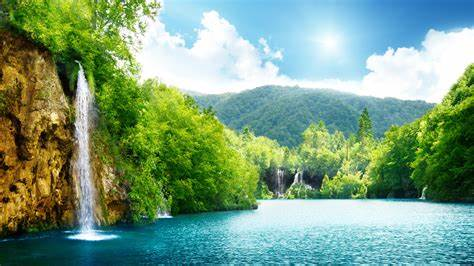

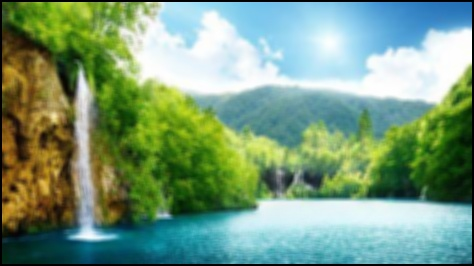

In [13]:
import cv2 as cv
import numpy as np 
from IPython.display import Image, display

def box_filter(image_path, kernel_size=(3, 3)):
    # Load the image
    img = cv.imread(image_path)

    # Define the kernel 
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])

    # Get the dimensions of the image
    image_height, image_width, image_channels = img.shape

    # Compute the number of padding pixels
    padding = (kernel_size[0] - 1) // 2

    # Create a variable to store the filtered image
    filtered_image = np.zeros((image_height, image_width, image_channels), dtype=np.uint8)

    # Apply the convolution filter to each pixel in the image
    for y in range(padding, image_height - padding):
        for x in range(padding, image_width - padding):
            for z in range(image_channels):
                # Extract the kernel-sized window from the image
                window = img[y-padding:y+padding+1, x-padding:x+padding+1, z]
                # Apply the convolution filter
                filtered_pixel = np.sum(kernel * window)
                # Store the filtered result 
                filtered_image[y, x, z] = np.clip(filtered_pixel, 0, 255)

    # Return the filtered image
    return filtered_image

# Filter the image with a box filter
filtered_image = box_filter('OIP.jpg', kernel_size=(5, 5))

# Save modified image
output_file = "box_filter.jpg"
cv.imwrite(output_file, filtered_image)

# Display the original and filtered images
display(Image(filename='OIP.jpg'))
display(Image(filename=output_file))


# c. Anti-aliasing Filter
Now we have code/functions that can filter an image, then downsample it. Write code to put these functions together to box filter an image (prefilter) prior to downsampling. Compare the result to the purely down-sampled version for at least one example.



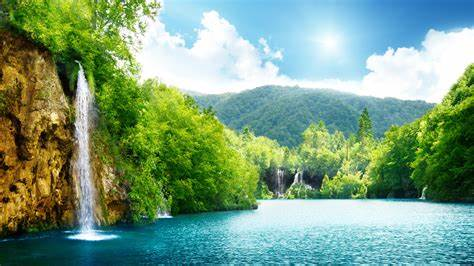

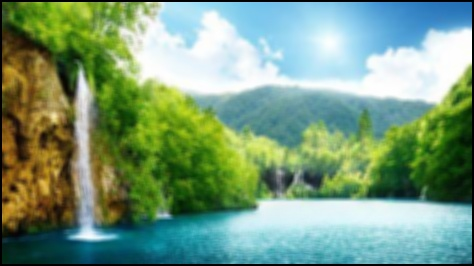

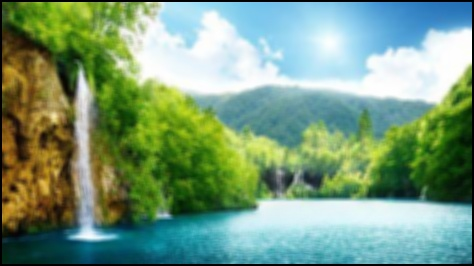

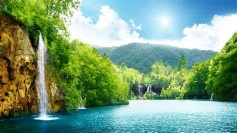

In [14]:
import cv2 as cv
import numpy as np 
from IPython.display import Image, display

def box_filter(image, kernel_size):
    # Defining the kernel 
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    # Applying the convolution filter
    kernel_height, kernel_width = kernel.shape
    # Get the dimensions of the image
    image_height, image_width, image_channels = image.shape
    # Compute the number of padding pixels
    padding = (kernel_width - 1) // 2
    # Creating a variable to store the filtered image
    filtered_image = np.zeros((image_height, image_width, image_channels), dtype=np.uint8)

    #Apply the convolution filter to each pixel in the image
    for y in range(padding, image_height - padding):
        for x in range(padding, image_width - padding):
            for z in range(image_channels):
                # Extract the kernel-sized window from the image
                window = image[y-padding:y+padding+1, x-padding:x+padding+1, z]
                # Apply the convolution filter
                filtered_pixel = np.sum(kernel * window)
                # Store the filtered result 
                filtered_image[y, x, z] = np.clip(filtered_pixel, 0, 255)
                
    return filtered_image

def downsample(image, scale_percent):
    # Get the dimensions of the image
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)

    # Resize the image
    resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
    
    return resized

# Load the image
img = cv.imread('OIP.jpg')

# Apply box filter followed by downsampling
filtered = box_filter(img, 5)
downsampled = downsample(filtered, 50)

output_file_0 = 'box_filter.jpg'
cv.imwrite(output_file_0, filtered)

output_file_1 = 'downsampling.jpg'
cv.imwrite(output_file_1, filtered_image)

# Display original, filtered, and downsampled images
display(Image(filename='OIP.jpg'))
display(Image(filename=output_file_0))
display(Image(filename=output_file_1))

# Compare filtered and downsampled to purely downsampled version
pure_downsampled = downsample(img, 50)

output_file_2 = 'pure_downsampled.jpg'
cv.imwrite(output_file_2, pure_downsampled)

display(Image(filename=output_file_2))



# d. High Pass Filtering

Use the above convolution filter code to implement and test the following high-pass filter:

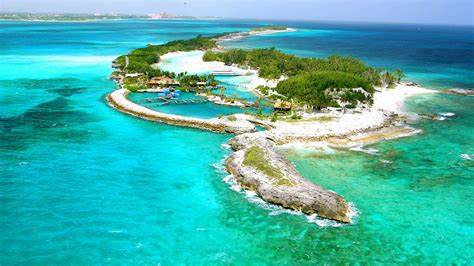

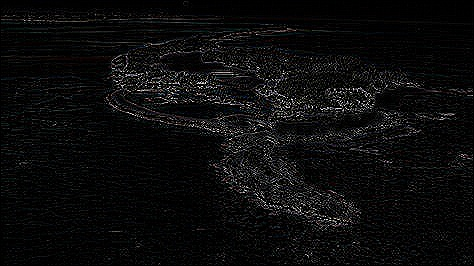

In [15]:
import cv2 as cv
import numpy as np 
from IPython.display import Image, display

def high_pass_filter(image):
    # Define the kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])

    # Apply the convolution filter
    kernel_height, kernel_width = kernel.shape
    # Get the dimensions of the image
    image_height, image_width, image_channels = image.shape
    # Compute the number of padding pixels
    padding = (kernel_width - 1) // 2
    # Creating a variable to store the filtered image
    filtered_image = np.zeros((image_height, image_width, image_channels), dtype=np.uint8)

    # Apply the convolution filter to each pixel in the image
    for y in range(padding, image_height - padding):
        for x in range(padding, image_width - padding):
            for z in range(image_channels):
                # Extract the kernel-sized window from the image
                window = image[y-padding:y+padding+1, x-padding:x+padding+1, z]
                # Apply the convolution filter
                filtered_pixel = np.sum(kernel * window)
                # Store the filtered result 
                filtered_image[y, x, z] = np.clip(filtered_pixel, 0, 255)
                
    return filtered_image

# Load the image
img = cv.imread('Bahamas.jpg')

# Apply high-pass filter
filtered = high_pass_filter(img)
output_file = 'high_pass_filter.jpg'
cv.imwrite(output_file, filtered)

# Display original and filtered images
display(Image(filename='Bahamas.jpg'))
display(Image(filename=output_file))


# 3. (Undergraduate Students) Gaussian Filtering
Still using the previously developed framework, implement a function to filter an image using a Gaussian fiter.

The Gaussian filter is parameterized by a sigma parameter, which roughly controls the width of the Gaussian bell curve (See image below). One question that comes up is, how large should the filter window be relative to sigma? 99% of the probability mass of a Guassian is within +/- 3 standard deviations, make the kernel window 6 times the size of sigma. It ought to be an odd number, so make it be the next highest odd integer from 6x sigma.

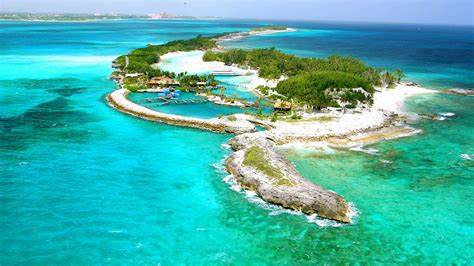

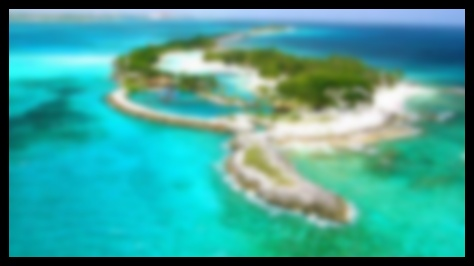

In [16]:
import cv2 as cv
import numpy as np 
from IPython.display import Image, display

def gaussian_filter(image, sigma):
    # Define kernel size
    k = int(6 * sigma) + 1
    if k % 2 == 0:
        k += 1

    # Create a 2D Gaussian kernel
    kernel = np.zeros((k, k), dtype=np.float32)
    for i in range(k):
        for j in range(k):
            x, y = i - k // 2, j - k // 2
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)

    # Apply the convolution filter
    kernel_height, kernel_width = kernel.shape
    # Get the dimensions of the image
    image_height, image_width, image_channels = image.shape
    # Compute the number of padding pixels
    padding = (kernel_width - 1) // 2
    # Creating a variable to store the filtered image
    filtered_image = np.zeros((image_height, image_width, image_channels), dtype=np.uint8)

    # Apply the convolution filter to each pixel in the image
    for y in range(padding, image_height - padding):
        for x in range(padding, image_width - padding):
            for z in range(image_channels):
                # Extract the kernel-sized window from the image
                window = image[y - padding:y + padding + 1, x - padding:x + padding + 1, z]
                # Apply the convolution filter
                filtered_pixel = np.sum(kernel * window)
                # Store the filtered result 
                filtered_image[y, x, z] = np.clip(filtered_pixel, 0, 255)

    return filtered_image


# Load and filter the image using Gaussian filter
img = cv.imread('Bahamas.jpg')
filtered_img = gaussian_filter(img, 3)
output_file = 'gaussian_filter.jpg'
cv.imwrite(output_file, filtered_img)

# Display original and filtered images
display(Image(filename='Bahamas.jpg'))
display(Image(filename=output_file))